In [2]:
# 1
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 500

# Initialize array to store data points
R = np.zeros(n)

# Generate data points using the AR(3) process
for t in range(3, n):
    R[t] = 0.01 + 0.1 * R[t-1] - 0.1 * R[t-3] + np.random.normal()

# Display first few data points
print("First 10 data points:")
print(R[:10])

First 10 data points:
[ 0.          0.          0.          0.50671415 -0.07759289  0.64992925
  1.54735137 -0.06165895 -0.29529578  1.4049481 ]


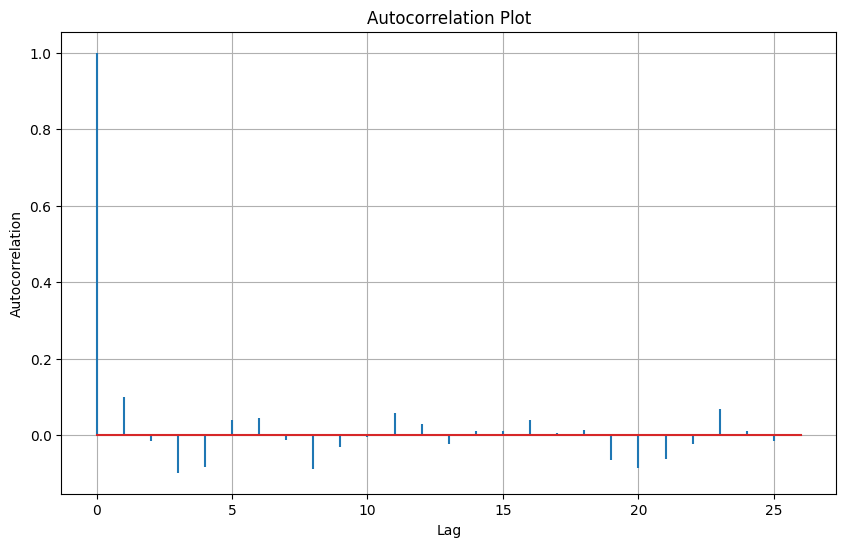

In [3]:
# 2
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 500

# Initialize array to store data points
R = np.zeros(n)

# Generate data points using the AR(3) process
for t in range(3, n):
    R[t] = 0.01 + 0.1 * R[t-1] - 0.1 * R[t-3] + np.random.normal()

# Compute autocorrelation
autocorr = sm.tsa.acf(R)

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.stem(range(len(autocorr)), autocorr, markerfmt=' ')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

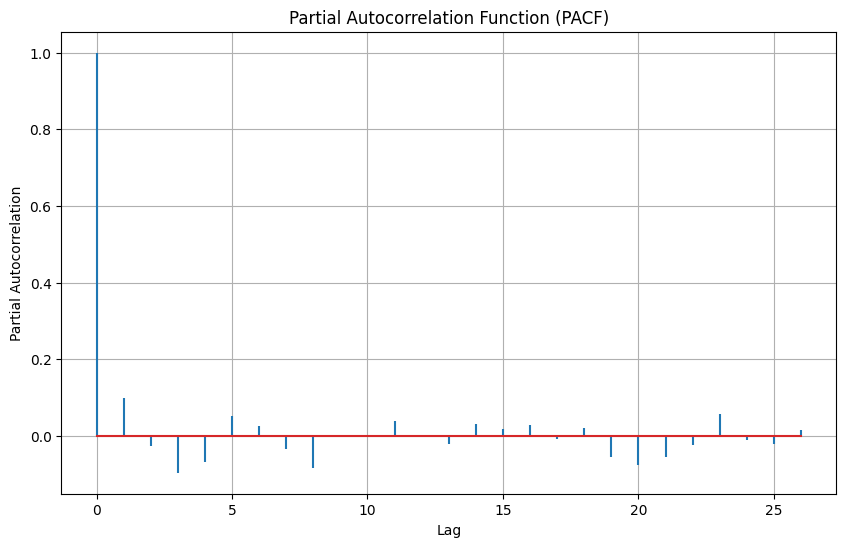

In [4]:
# 3
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 500

# Initialize array to store data points
R = np.zeros(n)

# Generate data points using the AR(3) process
for t in range(3, n):
    R[t] = 0.01 + 0.1 * R[t-1] - 0.1 * R[t-3] + np.random.normal()

# Compute partial autocorrelation
pacf = sm.tsa.pacf(R)

# Plot PACF
plt.figure(figsize=(10, 6))
plt.stem(range(len(pacf)), pacf, markerfmt=' ')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

In [7]:
# 4
import numpy as np
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 500

# Initialize array to store data points
R = np.zeros(n)

# Generate data points using the AR(3) process
for t in range(3, n):
    R[t] = 0.01 + 0.1 * R[t-1] - 0.1 * R[t-3] + np.random.normal()

# Initialize variables for AIC computation
best_aic = np.inf
best_order = None

# Iterate over potential orders
for order in range(1, 11):  # Try orders from 1 to 10
    # Fit AR model of current order
    ar_model = sm.tsa.AutoReg(R, lags=order)
    ar_result = ar_model.fit()
    
    # Compute AIC
    aic = ar_result.aic
    
    # Update best AIC and order if current AIC is lower
    if aic < best_aic:
        best_aic = aic
        best_order = order

print("Best order estimated using AIC:", best_order)

Best order estimated using AIC: 10


In [8]:
# 5
import numpy as np
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 500

# Initialize array to store data points
R = np.zeros(n)

# Generate data points using the AR(3) process
for t in range(3, n):
    R[t] = 0.01 + 0.1 * R[t-1] - 0.1 * R[t-3] + np.random.normal()

# Selected order obtained from AIC estimation
selected_order = 3  # Replace with the order obtained from AIC estimation

# Fit AR model with selected order
ar_model = sm.tsa.AutoReg(R, lags=selected_order)
ar_result = ar_model.fit()

# Print parameter estimates
print("Parameter Estimates:")
print(ar_result.params)

Parameter Estimates:
[ 0.02209528  0.09915272 -0.01536539 -0.09605086]


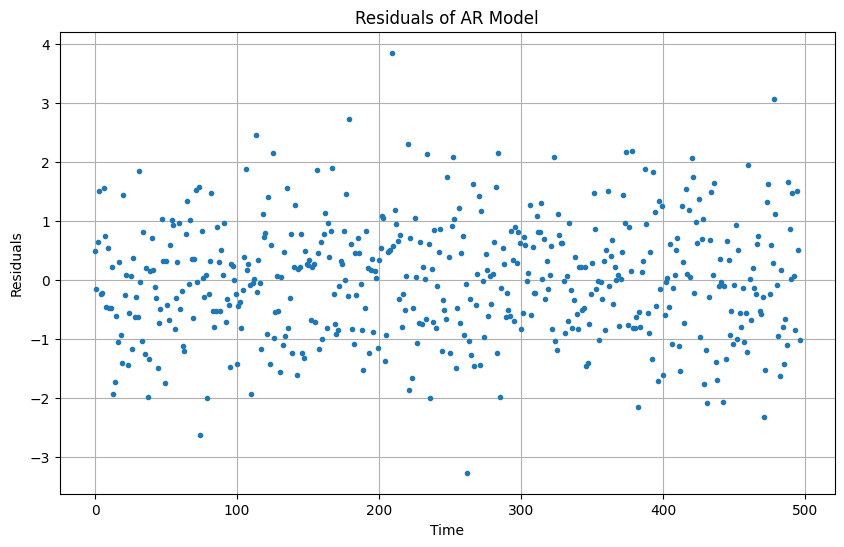

C:\Users\user\anaconda3\envs\v37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


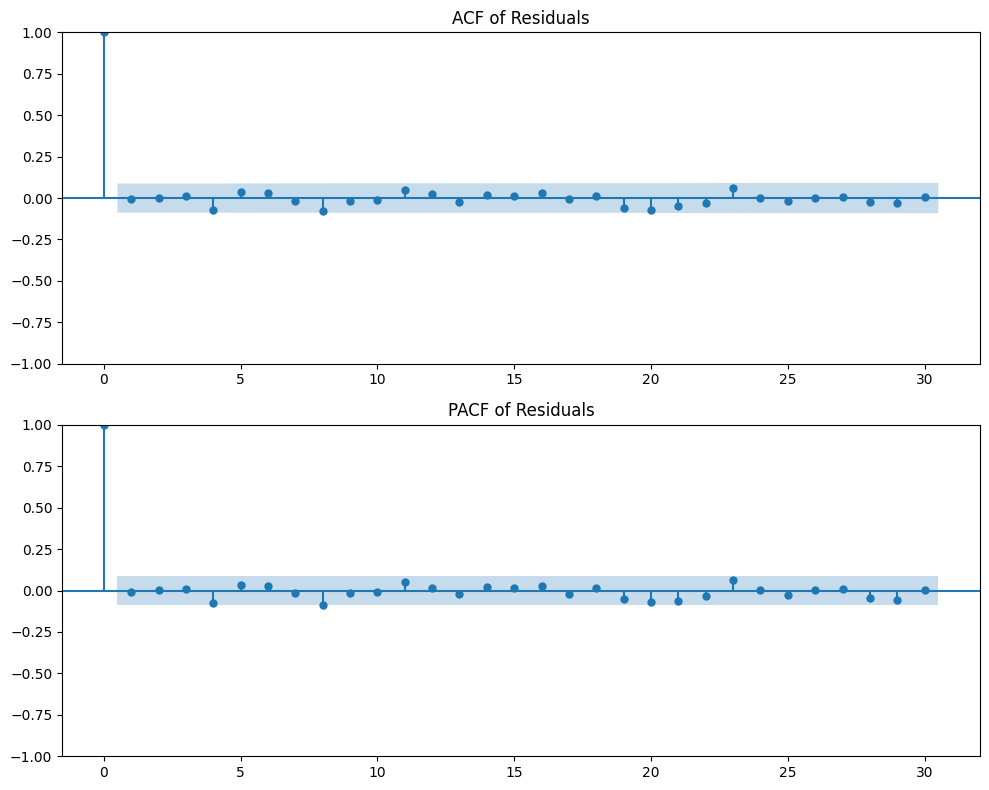

In [9]:
# 6
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 500

# Initialize array to store data points
R = np.zeros(n)

# Generate data points using the AR(3) process
for t in range(3, n):
    R[t] = 0.01 + 0.1 * R[t-1] - 0.1 * R[t-3] + np.random.normal()

# Selected order obtained from AIC estimation
selected_order = 3  # Replace with the order obtained from AIC estimation

# Fit AR model with selected order
ar_model = sm.tsa.AutoReg(R, lags=selected_order)
ar_result = ar_model.fit()

# Obtain residuals
residuals = ar_result.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='None', markersize=3)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals of AR Model')
plt.grid(True)
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(residuals, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=30, ax=ax[1])
ax[0].set_title('ACF of Residuals')
ax[1].set_title('PACF of Residuals')
plt.tight_layout()
plt.show()